In [1]:
import pandas as pd

csv_path = 'data/preprocessed_train_data.csv' 

df = pd.read_csv(csv_path)

max_length = df['comment'].apply(len).max()

print(f'The length of the longest comment is {max_length}.')

The length of the longest comment is 5000.


In [2]:
import matplotlib.pyplot as plt

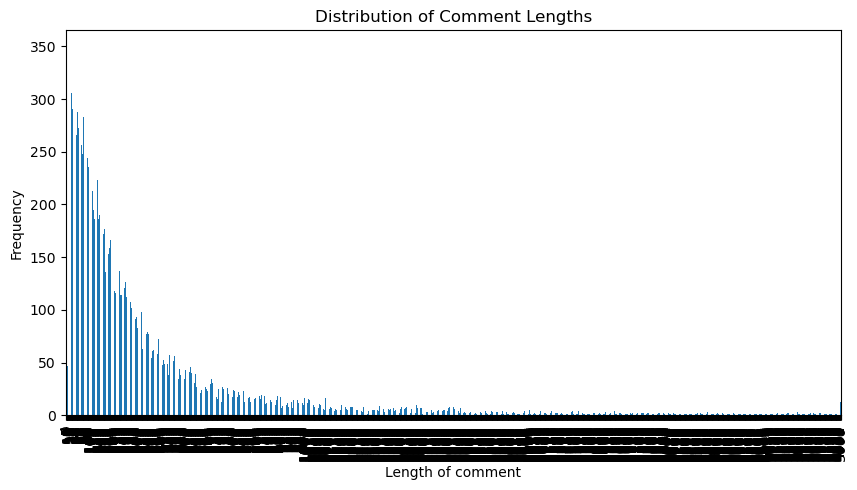

In [3]:
df = pd.read_csv(csv_path)

df['length'] = df['comment'].apply(len)

length_counts = df['length'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
length_counts.plot(kind='bar')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of comment')
plt.ylabel('Frequency')
plt.show()

In [6]:
median_length = df['length'].median()
quantiles = df['length'].quantile([0.75, 0.85, 0.90, 0.95, 0.99])
max_length = df['length'].max()

print(f'Median (50% quantile): {median_length}')
print(f'75% quantile: {quantiles[0.75]}')
print(f'85% quantile: {quantiles[0.85]}')
print(f'90% quantile: {quantiles[0.90]}')
print(f'95% quantile: {quantiles[0.95]}')
print(f'99% quantile: {quantiles[0.99]}')
print(f'Maximum length: {max_length}')

Median (50% quantile): 197.0
75% quantile: 423.0
85% quantile: 641.0
90% quantile: 862.0
95% quantile: 1309.0
99% quantile: 3248.4800000000105
Maximum length: 5000


## 추론 결과 비교

In [20]:
csv_path_gru_rnn = 'result/inferenced_by_GRU_RNN.csv'
csv_path_bow = 'result/inferenced_by_BOW.csv'
csv_path_LSTM = 'result/inferenced_by_LSTM.csv'
df_gru_rnn = pd.read_csv(csv_path_gru_rnn2)
df_bow = pd.read_csv(csv_path_bow)
df_LSTM = pd.read_csv(csv_path_LSTM)

In [23]:
count_ones_bow = df_bow['pred'].sum()
count_ones_gru_rnn = df_gru_rnn['pred'].sum()
count_ones_LSTM = df_LSTM['pred'].sum()

In [24]:
print(count_ones_bow)
print(count_ones_gru_rnn)
print(count_ones_LSTM)

1850
2492
4535


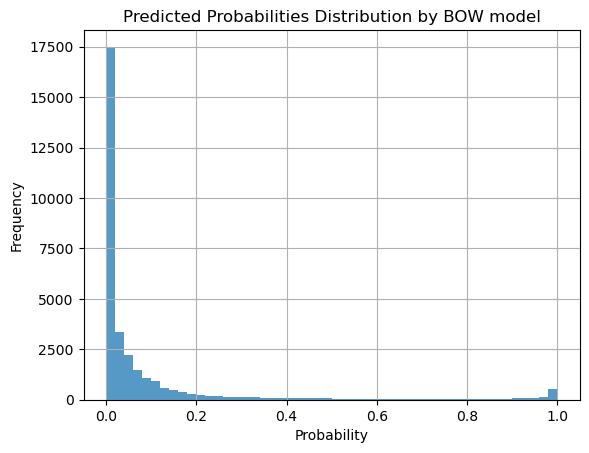

In [31]:
plt.hist(df_bow['probability'], bins=50, alpha=0.75)
plt.title('Predicted Probabilities Distribution by BOW model')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

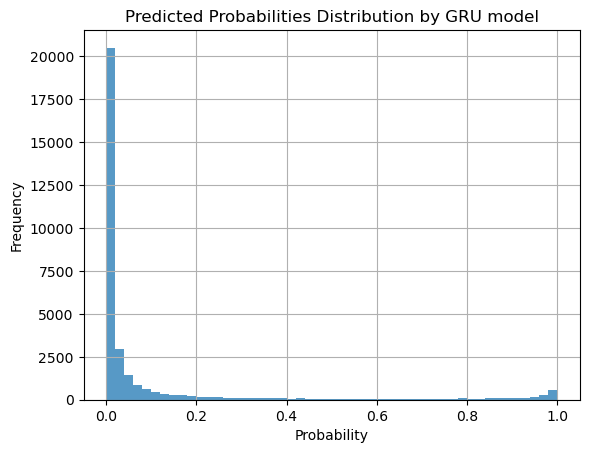

In [32]:
plt.hist(df_gru_rnn['probability'], bins=50, alpha=0.75)
plt.title('Predicted Probabilities Distribution by GRU model')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

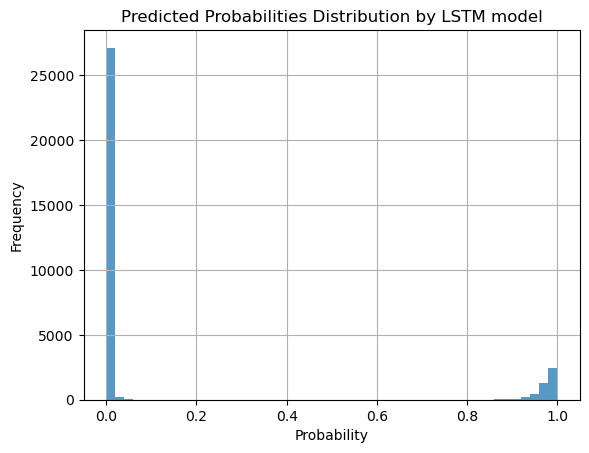

In [33]:
plt.hist(df_LSTM['probability'], bins=50, alpha=0.75)
plt.title('Predicted Probabilities Distribution by LSTM model')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [30]:
high_confidence_count_BOW = (df_bow['probability'] >= 0.9).sum()
low_confidence_count_BOW = (df_bow['probability'] <= 0.1).sum()

high_confidence_count_GRU = (df_gru_rnn['probability'] >= 0.9).sum()
low_confidence_count_GRU = (df_gru_rnn['probability'] <= 0.1).sum()

high_confidence_count_LSTM = (df_LSTM['probability'] >= 0.9).sum()
low_confidence_count_LSTM = (df_LSTM['probability'] <= 0.1).sum()

print("<BOW model>")
print(f"확률이 0.9 이상인 예측의 수: {high_confidence_count_BOW}")
print(f"확률이 0.1 이하인 예측의 수: {low_confidence_count_BOW}")

print("<GRU model>")
print(f"확률이 0.9 이상인 예측의 수: {high_confidence_count_GRU}")
print(f"확률이 0.1 이하인 예측의 수: {low_confidence_count_GRU}")

print("<LSTM model>")
print(f"확률이 0.9 이상인 예측의 수: {high_confidence_count_LSTM}")
print(f"확률이 0.1 이하인 예측의 수: {low_confidence_count_LSTM}")

<BOW model>
확률이 0.9 이상인 예측의 수: 883
확률이 0.1 이하인 예측의 수: 25593
<GRU model>
확률이 0.9 이상인 예측의 수: 1242
확률이 0.1 이하인 예측의 수: 26435
<LSTM model>
확률이 0.9 이상인 예측의 수: 4448
확률이 0.1 이하인 예측의 수: 27378
